# Pymaceuticals Inc.
---

### Analysis

In this assignment, I was asked to analyze the treatment of 249 mice, and to compare the success of Capomulin in treating SCC tumors to several other drugs. From the data analyzed below, and judging by the graphs used to visualize the data, Capomulin is highly successful in treating SCC tumors, leading to final tumor volumes that are significantly smaller than nearly every other treatment, except Ramicane (see box-and-whisker plot below). Indeed, the maximum final tumor volume of Capomulin sits below 50mm3, near the minimum final tumor volumes of the placebo group and nearly every other treatment, except Ramicane. This indicates extraordinary effectiveness, compared to nearly every other available treatment, as the worst outcome of mice treated with Capomulin is the best-case scenario for mice treated with most other drugs or who have been left untreated in the placebo group. In fact, Capomulin and Ramicane are the only drugs to significantly outperform the placebo group in terms of their outcome, judged by the final measured tumor volume. All seven other drugs cannot achieve a lower minimum tumor volume than the placebo group, except for an outlier in the Infubinol group, and the median tumor volume of these seven drugs sits above 50 cubic milimeters, compared to the Capomulin group which sits at 41.6 mm3. From the line plot tracking the tumor volume of mouse j246 - chosen because of its proximity to the median final tumor volume for the Capomulin treatment group - we can see that Capomulin can lead to a 5 cubic milimeter decrease in tumor volume for some mice, indicating significant remission of SCC tumors during treatment. Taking these outcomes into consideration, we can conclude that Capomulin is an extraordinarily effective treatment for mice with SCC tumors and is far more effective than other available treatments.

However, according to this data set, Capomulin cannot be called the most effective drug that can be used to treat SCC tumors. In many ways, Ramicane represents the most comparable treatment in this group to Capomulin. Both have a similar number of timepoints (see 'Total Number of Time Points for Each Drug Regimen' bar plot), and both have a similar distribution of outcomes, when comparing final tumor volumes. Although these treatments are similar in these regards, Ramicane slightly outperforms Capomulin: its maximum and minimum final tumor volumes are lower, as is its median final tumor volume by around one cubic milimeter. 

From the provided data set, we can draw the conclusion that Capomulin and Ramicane represent the most effective treatments for SCC tumors, as each drug's treatment group experiences smaller final tumor volumes than the placebo group and the seven other treatments that were analyzed. Although Ramicane narrowly outperforms Capomulin, these treatments can be understood as comparable and highly effective treatments, in contrast to the other seven available treatments.
 

In [744]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
display(combined_data)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [745]:
# Checking the number of mice.
num_mice = pd.unique(combined_data["Mouse ID"])
num_mice = len(num_mice)
print("Total Number of Mice:", num_mice)


Total Number of Mice: 249


In [746]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep="first")]
display(duplicates)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [747]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_ids = duplicates['Mouse ID'].unique()
# Select all rows with duplicate IDs, using boolean indexing
duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_ids)]
#display DataFrame
display(duplicate_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [748]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_id = "g989"
cleaned_data = combined_data.drop(combined_data[combined_data["Mouse ID"] == drop_id].index)

# Print DataFrame
cleaned_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [749]:
# Checking the number of mice in the clean DataFrame.
num_mice = pd.unique(cleaned_data["Mouse ID"])
num_mice = len(num_mice)
print("Total Number of Mice:", num_mice)

Total Number of Mice: 248


## Summary Statistics

In [750]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
avg_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary = {"Mean Tumor Volume": avg_tumor,
                "Median Tumor Volume": med_tumor,
                "Tumor Volume Variance": variance_tumor,
                "Tumor Volume Std. Dev.": std_tumor,
                "Tumor Volume SEM": sem_tumor}

summary = pd.DataFrame(summary)

summary
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [751]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use aggregation to calculate the summary statistics in a single line

summary = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns for better clarity
summary = summary.rename(columns={"Drug Regimen": "Drug Regimen",
                                "mean": "Mean Tumor Volume", 
                                "median": "Median Tumor Volume", 
                                "var": "Tumor Volume Variance",
                                "std": "Tumor Volume Std. Dev.", 
                                "sem": "Tumor Volume SEM"})

# Print the resulting DataFrame
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


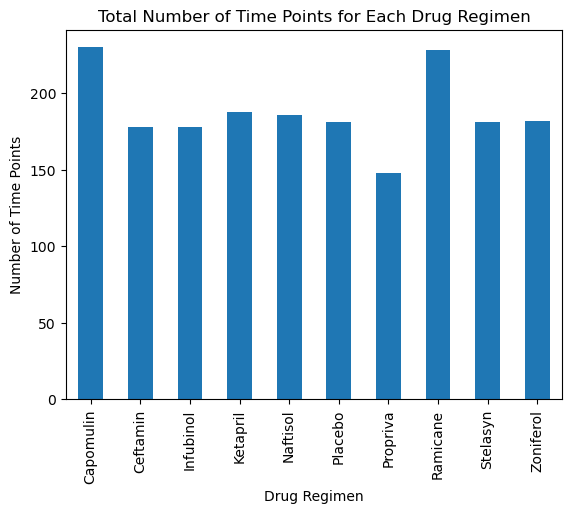

In [752]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Calculate the number of time points for each drug regimen
timepoints = cleaned_data.groupby("Drug Regimen")["Timepoint"].count()

# Create the first bar chart using Pandas
timepoints.plot(kind='bar', title='Total Number of Time Points for Each Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Time Points')
print(timepoints)


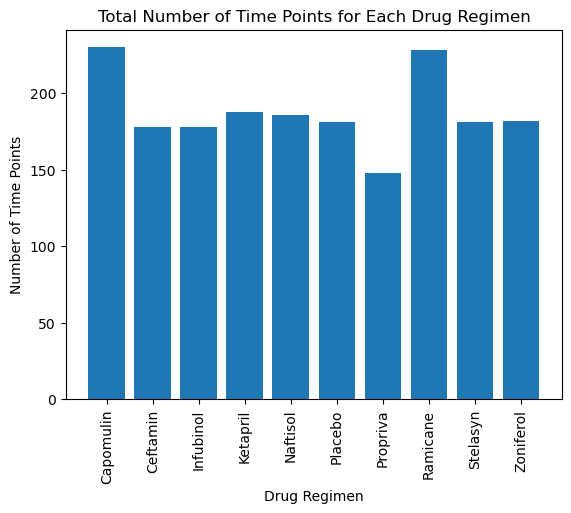

In [753]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoints.index, timepoints.values)
plt.xticks(timepoints.index, rotation=90)
plt.title("Total Number of Time Points for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Points")
#Display bar plot
plt.show()

<AxesSubplot:title={'center':'Distribution of Male vs. Female Mice'}, ylabel='Sex'>

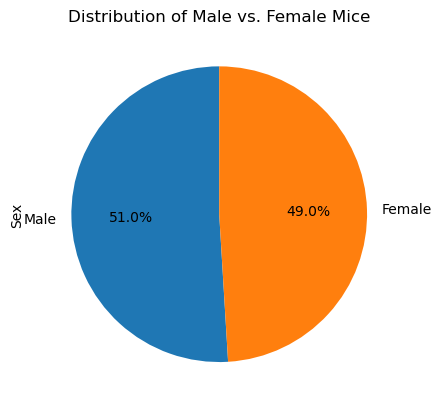

In [754]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the number of male and female mice
gender_counts = cleaned_data["Sex"].value_counts()

# Create and display pie plot 
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Distribution of Male vs. Female Mice")

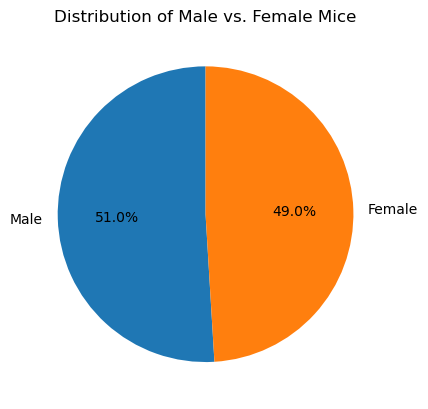

In [755]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a pie plot using Matplotlib
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Male vs. Female Mice")

#Display pie plot
plt.show()


## Quartiles, Outliers and Boxplots

In [756]:
# Find max tumor volume
final_tumor_vol = cleaned_data.sort_values("Timepoint", ascending=False).groupby("Mouse ID").first()["Tumor Volume (mm3)"]
final_tumor_vol = pd.DataFrame(final_tumor_vol)
# Find max time points for each mouse
# max_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max().to

# Merge DataFrames; rename columns
max_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max().to_frame().reset_index()
merge_time_tumor = pd.merge(final_tumor_vol.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume (mm3)"}),
                            max_timepoints.rename(columns={"Timepoint": "Final Timepoint"}),
                            how="left", on=["Mouse ID"])



# Merge cleaned_data with merged time and tumor DataFrames
merge_df = pd.merge(cleaned_data, merge_time_tumor, how="left", on=["Mouse ID"])

# Display DataFrame
merge_df




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3),Final Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126,45
...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,73.867845,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,73.867845,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,73.867845,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,73.867845,45


In [757]:
# create a DataFrame with the last timepoint for each mouse ID using groupby
last_timepoint = merge_df.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)


# create a list of treatment groups
treatments = pd.unique(combined_data["Drug Regimen"]).tolist()

# create an empty list to fill with tumor volume data
tumor_volumes = []

# loop through each treatment group
for treatment in treatments:
    # subset the final tumor volume DataFrame for the current treatment
    treatment_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == treatment]
    # extract the tumor volume data for the current treatment
    tumor_volumes.append(treatment_df["Tumor Volume (mm3)"])

# reset the index of the tumor volume DataFrame
tumor_volumes_df = pd.DataFrame(tumor_volumes).transpose().reset_index(drop=True)

# create a loop to find upper bounds, lower bounds, and outliers in each treatment column
for treatment in treatments:
    # subset the final tumor volume DataFrame for the current treatment
    treatment_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == treatment]
    # extract the tumor volume data for the current treatment
    tumor_volumes = treatment_df["Tumor Volume (mm3)"]
    # calculate the IQR, Q1 and Q3 for the tumor volume data
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    # find upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # find potential outliers
    outliers = tumor_volumes[(tumor_volumes <= lower_bound) | (tumor_volumes >= upper_bound)]

    # print IQR, treatments, and respective lists of outliers
    print(f"IQR for {treatment}: {IQR}")
    print(f"treatment: {treatment}; potential outliers: {outliers.tolist() if not outliers.empty else 'None'}")
#Reset quartiles and IQR for next loop
    Q1 = 0
    Q3 = 0
    IQR = 0



IQR for Ramicane: 9.098536719999998
treatment: Ramicane; potential outliers: None
IQR for Capomulin: 7.781863460000004
treatment: Capomulin; potential outliers: None
IQR for Infubinol: 11.477135160000003
treatment: Infubinol; potential outliers: [36.3213458]
IQR for Placebo: 15.191386480000006
treatment: Placebo; potential outliers: None
IQR for Ceftamin: 15.577752179999997
treatment: Ceftamin; potential outliers: None
IQR for Stelasyn: 16.62734878500001
treatment: Stelasyn; potential outliers: None
IQR for Zoniferol: 16.805853529999993
treatment: Zoniferol; potential outliers: None
IQR for Ketapril: 13.152155339999993
treatment: Ketapril; potential outliers: None
IQR for Propriva: 13.569628922499994
treatment: Propriva; potential outliers: None
IQR for Naftisol: 17.484110670000007
treatment: Naftisol; potential outliers: None


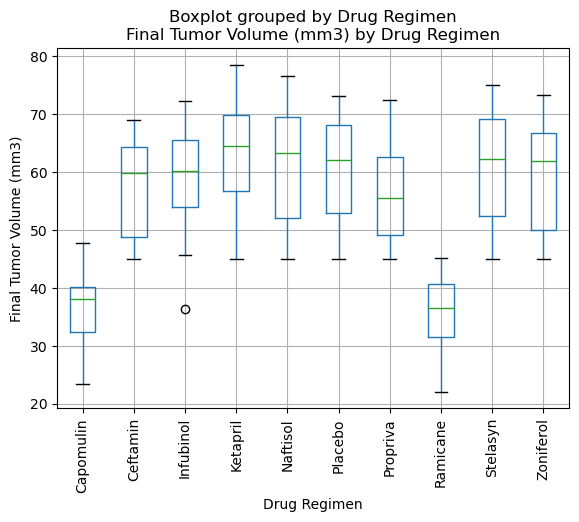

In [758]:
#create boxplot
final_tumor_volume_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", showfliers=True)

# format plot labels and title
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume (mm3) by Drug Regimen")
plt.show()


## Line and Scatter Plots

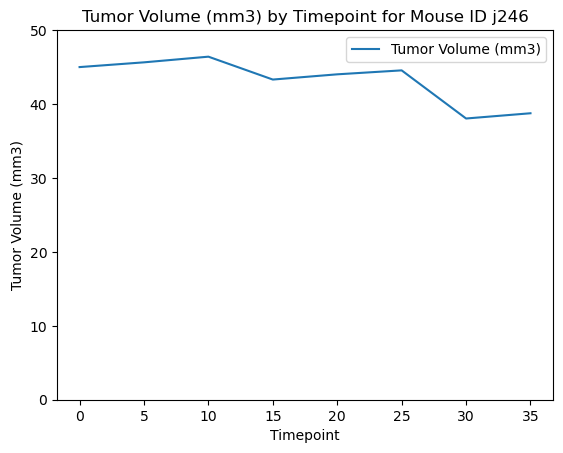

In [759]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Set Mouse ID to observe
selected_mouse = "j246"	
line_plot_data = merge_df[merge_df["Mouse ID"] == selected_mouse]

#Plot data, then format
line_plot_data.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line")
plt.title("Tumor Volume (mm3) by Timepoint for Mouse ID j246")
plt.ylabel("Tumor Volume (mm3)")
#Starting y-axis at 0 to prevent deceptive appearance of line
plt.ylim(0,50)
plt.show()


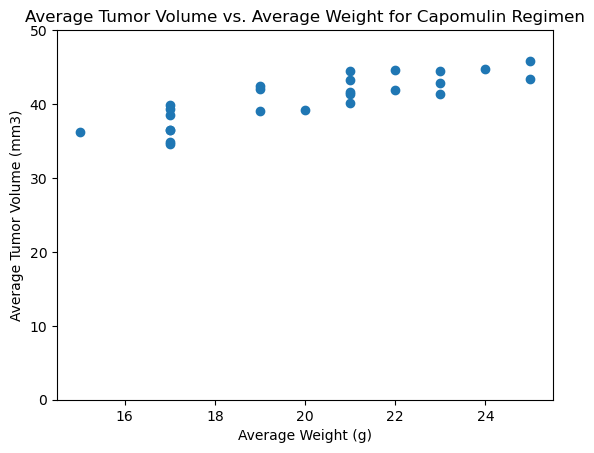

In [760]:
# Select treatment to observe
selected_treatment = "Capomulin"
scatter_data = merge_df[merge_df["Drug Regimen"] == selected_treatment]

# Create empty lists to store average tumor volume and weight for each mouse
avg_tumor_list = []
avg_weight_list = []

# Loop over unique Mouse IDs in the treatment data
for mouse_id in scatter_data["Mouse ID"].unique():
    
    mouse_data = scatter_data[scatter_data["Mouse ID"] == mouse_id]
    # Calculate the average tumor volume and weight for the current mouse
    avg_tumor = mouse_data["Tumor Volume (mm3)"].mean()
    avg_weight = mouse_data["Weight (g)"].mean()
    # Add the average tumor volume and weight to lists
    avg_tumor_list.append(avg_tumor)
    avg_weight_list.append(avg_weight)

# Plot the scatter plot
plt.scatter(x=avg_weight_list, y=avg_tumor_list)

# Set the plot title and axis labels
plt.title("Average Tumor Volume vs. Average Weight for Capomulin Regimen")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Starting and y-axis at 0 to prevent deceptive appearance of plot
plt.ylim(0,50)


# Show the plot
plt.show()




## Correlation and Regression

Correlation Coefficient: 0.84194
  
Linear Regression Model:


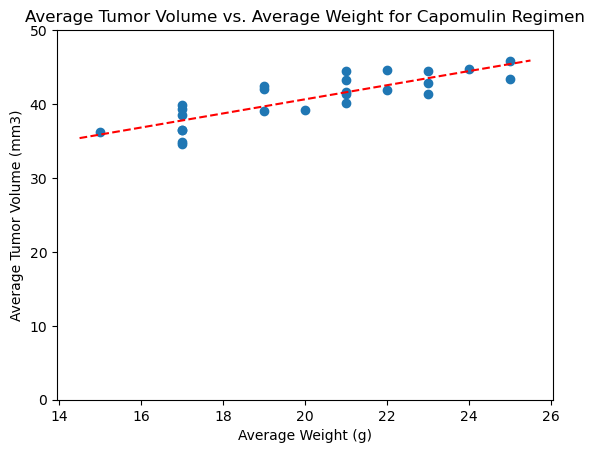

In [761]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_weight_list, avg_tumor_list)
print(f"Correlation Coefficient: {correlation[0]:.5f}")

# Calculate linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(avg_weight_list, avg_tumor_list)
x_vals = np.array(plt.xlim())
y_vals = slope * x_vals + intercept

# Plot the scatter plot
plt.scatter(x=avg_weight_list, y=avg_tumor_list)

# Set the plot title and axis labels
plt.title("Average Tumor Volume vs. Average Weight for Capomulin Regimen")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Starting y-axis at 0 to prevent deceptive appearance of plot
plt.ylim(0,50)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_weight_list, avg_tumor_list)
x_vals = np.array(plt.xlim())
y_vals = slope * x_vals + intercept

# Plot the regression line
plt.plot(x_vals, y_vals, linestyle='--', color='red')

# Show the plot
print("  ")
print("Linear Regression Model:")
plt.show()
